In [105]:
import pandas as pd

file_path = "Norm_Ath_Data.csv"
df = pd.read_csv(file_path)
df

,Age,Sex,Sport,Concussion History,Concussion Number,Anxiety Diagnosis,Anxiety Symptoms,Depression Diagnosis,Number of Prior Depressive Episodes,PCS Symptom Frequency,...,Headache,Dizziness,Fatigue,Light Sensitivity,Mentally Foggy,Difficulty Concentrating,Less Sleep,Irritability,Sadness,Nervousness
0,13,Female,Hockey,Yes,1,No,No,No,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,Female,Hockey,Yes,2,No,No,No,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,Female,Rugby,Yes,1,No,No,No,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,Female,Rugby,Yes,1,No,Yes,No,4,8,...,4,0,3,0,0,0,2,0,0,0
4,15,Female,Soccer,Yes,1,No,No,No,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,15,Male,Hockey,No,0,Yes,Yes,No,0,5,...,0,0,2,5,1,0,0,0,0,3
144,13,Male,Soccer,No,0,No,No,Yes,2,9,...,4,0,2,0,0,0,3,0,0,1
145,16,Male,Lacrosse,Yes,1,Yes,Yes,Yes,4,4,...,0,0,0,3,0,0,3,0,0,0
146,17,Male,Lacrosse,Yes,1,Yes,Yes,Yes,4,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Removing additional columns
columns_to_remove = [
    'Anxiety Diagnosis',
    'Anxiety Symptoms',
    'Number of Prior Depressive Episodes',
    'PCS Symptom Frequency',
    'Difficulty Concentrating',
    'Less Sleep',
    'Irritability',
    'Nervousness',
    'Light Sensitivity',
    'Fatigue'
]

simple_df = df.drop(columns = columns_to_remove, errors = 'ignore')

simple_df.head(10)

,Age,Sex,Sport,Concussion History,Concussion Number,Depression Diagnosis,PCS Symptom Severity,Total MFQ Score,Headache,Dizziness,Mentally Foggy,Sadness
0,13,Female,Hockey,Yes,1,No,0,0,0,0,0,0
1,13,Female,Hockey,Yes,2,No,0,5,0,0,0,0
2,14,Female,Rugby,Yes,1,No,0,4,0,0,0,0
3,14,Female,Rugby,Yes,1,No,27,10,4,0,0,0
4,15,Female,Soccer,Yes,1,No,1,1,0,0,0,0
5,15,Female,Rugby,Yes,1,No,2,4,0,0,0,0
6,15,Female,Rugby,Yes,1,No,0,15,0,0,0,0
7,15,Female,Rugby,Yes,1,No,7,2,1,0,0,2
8,15,Female,Cheerleading,Yes,1,No,7,11,0,0,0,0
9,15,Female,Hockey,Yes,1,No,18,13,0,0,0,0


In [66]:
# Saving updated dataset as CSV
simple_df.to_csv('/Users/dominicvaldiserri/Downloads/Simplified_Ath_Data.csv', index=False)

In [107]:
# Custom min-max scaling for symptom scores (0 to 6 scaled as percentage)
symptom_cols = ["Headache", "Dizziness", "Mentally Foggy", "Sadness"]
simple_df[symptom_cols] = simple_df[symptom_cols] / 6.0

In [108]:
# Custom min-max scaling for Age (13 to 18 -> 0 to 1)
simple_df["Age"] = (simple_df["Age"] - 13) / (18 - 13)

In [119]:
# Min-max scale remaining numeric columns
other_numeric_cols = ["Concussion Number", "PCS Symptom Severity", "Total MFQ Score"]
scaler = MinMaxScaler()
simple_df[other_numeric_cols] = scaler.fit_transform(simple_df[other_numeric_cols])

simple_df

,Age,Sex,Sport,Concussion History,Concussion Number,Depression Diagnosis,PCS Symptom Severity,Total MFQ Score,Headache,Dizziness,Mentally Foggy,Sadness
0,0.0,Female,Hockey,Yes,0.333333,No,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,Female,Hockey,Yes,0.666667,No,0.000000,0.094340,0.000000,0.000000,0.000000,0.0
2,0.2,Female,Rugby,Yes,0.333333,No,0.000000,0.075472,0.000000,0.000000,0.000000,0.0
3,0.2,Female,Rugby,Yes,0.333333,No,0.259615,0.188679,0.666667,0.000000,0.000000,0.0
4,0.4,Female,Soccer,Yes,0.333333,No,0.009615,0.018868,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.4,Male,Hockey,No,0.000000,No,0.125000,0.000000,0.000000,0.000000,0.166667,0.0
144,0.0,Male,Soccer,No,0.000000,Yes,0.230769,0.188679,0.666667,0.000000,0.000000,0.0
145,0.6,Male,Lacrosse,Yes,0.333333,Yes,0.115385,0.150943,0.000000,0.000000,0.000000,0.0
146,0.8,Male,Lacrosse,Yes,0.333333,Yes,0.000000,0.094340,0.000000,0.000000,0.000000,0.0


In [123]:
# Saving updated dataset as CSV
simple_df.to_csv('/Users/dominicvaldiserri/Downloads/Simplified_Ath_Data2.csv', index=False)

In [125]:
# One-hot encoding the specified categorical columns
columns_to_encode = ['Sex', 'Sport', 'Concussion History', 'Depression Diagnosis']
df_encoded= pd.get_dummies(simple_df, columns=columns_to_encode, drop_first=False, dtype=int)

df_encoded

,Age,Concussion Number,PCS Symptom Severity,Total MFQ Score,Headache,Dizziness,Mentally Foggy,Sadness,Sex_Female,Sex_Male,Sport_Cheerleading,Sport_Hockey,Sport_Lacrosse,Sport_Rugby,Sport_Soccer,Concussion History_No,Concussion History_Yes,Depression Diagnosis_No,Depression Diagnosis_Yes
0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0,1,0,0,0,0,1,1,0
1,0.0,0.666667,0.000000,0.094340,0.000000,0.000000,0.000000,0.0,1,0,0,1,0,0,0,0,1,1,0
2,0.2,0.333333,0.000000,0.075472,0.000000,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,1,1,0
3,0.2,0.333333,0.259615,0.188679,0.666667,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,1,1,0
4,0.4,0.333333,0.009615,0.018868,0.000000,0.000000,0.000000,0.0,1,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.4,0.000000,0.125000,0.000000,0.000000,0.000000,0.166667,0.0,0,1,0,1,0,0,0,1,0,1,0
144,0.0,0.000000,0.230769,0.188679,0.666667,0.000000,0.000000,0.0,0,1,0,0,0,0,1,1,0,0,1
145,0.6,0.333333,0.115385,0.150943,0.000000,0.000000,0.000000,0.0,0,1,0,0,1,0,0,0,1,0,1
146,0.8,0.333333,0.000000,0.094340,0.000000,0.000000,0.000000,0.0,0,1,0,0,1,0,0,0,1,0,1


In [127]:
import numpy as np
import scipy.stats as stats

# Split data into groups by concussion history
group_yes = df_encoded[df_encoded['Concussion History_Yes'] == 1]
group_no = df_encoded[df_encoded['Concussion History_No'] == 1]

# Define symptom variables
symptom_vars = ['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']

# Function to calculate 95% CI for the mean
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h, se

# Calculate CI for symptom variables in both groups
ci_results = []

for var in symptom_vars:
    for group_label, group in [('Concussion History = Yes', group_yes), ('Concussion History = No', group_no)]:
        mean, lower, upper, se = mean_confidence_interval(group[var])
        ci_results.append({
            'Group': group_label,
            'Variable': var,
            'Mean': mean,
            'Standard Error': se,
            '95% CI Lower': lower,
            '95% CI Upper': upper
        })

# Also calculate CI for proportion of Concussion History_Yes and Depression Diagnosis_Yes
binary_vars = ['Concussion History_Yes', 'Depression Diagnosis_Yes']
n_total = len(df_encoded)

for var in binary_vars:
    p = df_encoded[var].mean()
    se = np.sqrt(p * (1 - p) / n_total)
    ci_low, ci_up = stats.norm.interval(0.95, loc=p, scale=se)
    ci_results.append({
        'Group': 'Overall',
        'Variable': var,
        'Mean': p,
        'Standard Error': se,
        '95% CI Lower': ci_low,
        '95% CI Upper': ci_up
    })

ci_df = pd.DataFrame(ci_results)

ci_df

,Group,Variable,Mean,Standard Error,95% CI Lower,95% CI Upper
0,Concussion History = Yes,Headache,0.112319,0.031107,0.049666,0.174971
1,Concussion History = No,Headache,0.094771,0.018213,0.058642,0.130900
2,Concussion History = Yes,Dizziness,0.028986,0.011931,0.004954,0.053017
3,Concussion History = No,Dizziness,0.063725,0.015586,0.032808,0.094643
4,Concussion History = Yes,Mentally Foggy,0.061594,0.022794,0.015685,0.107503
5,Concussion History = No,Mentally Foggy,0.071895,0.016504,0.039156,0.104635
6,Concussion History = Yes,Sadness,0.083333,0.032249,0.018381,0.148286
7,Concussion History = No,Sadness,0.057190,0.017143,0.023183,0.091196
8,Overall,Concussion History_Yes,0.310811,0.038044,0.236246,0.385376
9,Overall,Depression Diagnosis_Yes,0.060811,0.019644,0.022309,0.099313


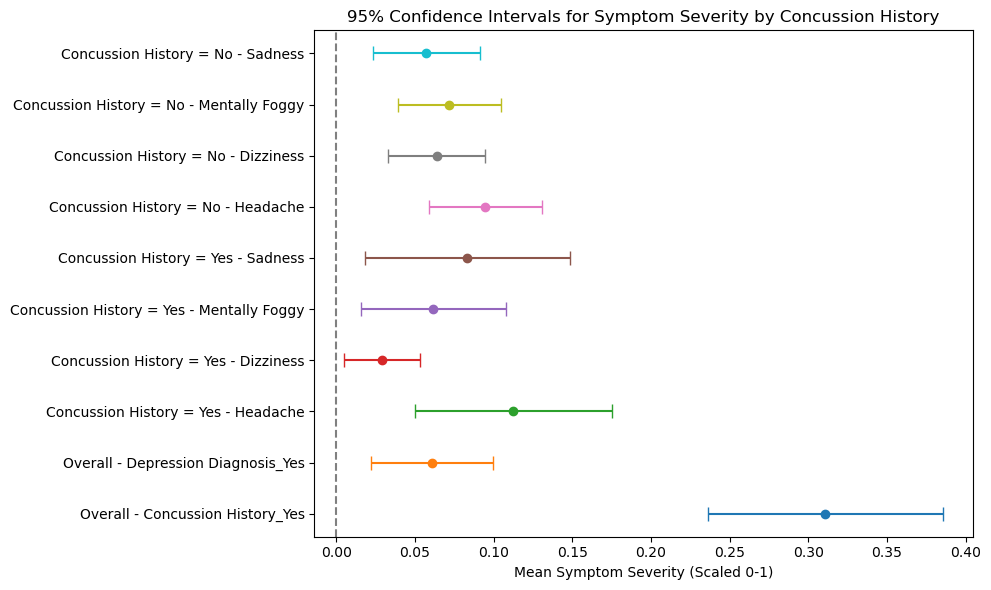

In [129]:
# 
symptom_ci_df_sorted = ci_df.sort_values(by='Group', ascending=False)

# 
fig, ax = plt.subplots(figsize=(10, 6))

for i, (idx, row) in enumerate(symptom_ci_df_sorted.iterrows()):
    ax.errorbar(x=row['Mean'], y=i, xerr=[[row['Mean'] - row['95% CI Lower']], 
                                          [row['95% CI Upper'] - row['Mean']]], 
                fmt='o', label=row['Group'] if i % 2 == 0 else "", capsize=5)

ax.set_yticks(range(len(symptom_ci_df_sorted)))
ax.set_yticklabels(symptom_ci_df_sorted['Group'] + " - " + symptom_ci_df_sorted['Variable'])
ax.axvline(x=0, color='gray', linestyle='--')
ax.set_xlabel('Mean Symptom Severity (Scaled 0-1)')
ax.set_title('95% Confidence Intervals for Symptom Severity by Concussion History')
plt.tight_layout()
plt.show()


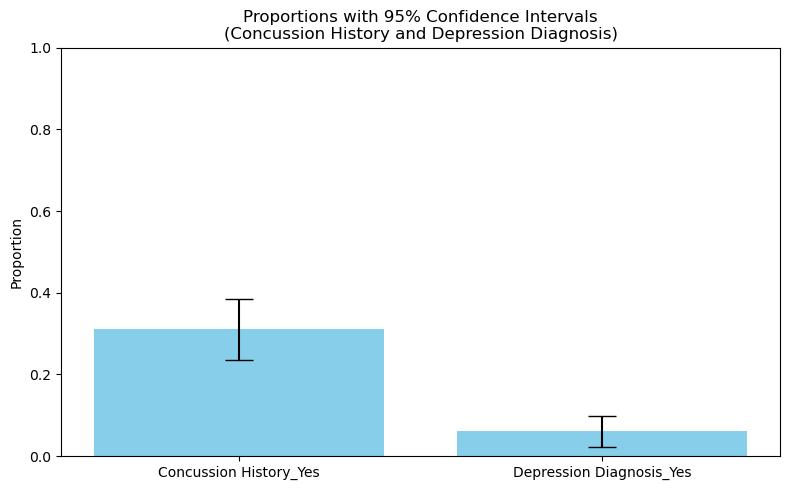

In [130]:
# Extract proportions and confidence intervals for binary variables
binary_ci_df = ci_df[ci_df['Variable'].isin(['Concussion History_Yes', 'Depression Diagnosis_Yes'])]

# Bar chart with error bars for proportions
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(binary_ci_df['Variable'], binary_ci_df['Mean'], yerr=[
    binary_ci_df['Mean'] - binary_ci_df['95% CI Lower'],
    binary_ci_df['95% CI Upper'] - binary_ci_df['Mean']
], capsize=10, color='skyblue')

ax.set_ylim(0, 1)
ax.set_ylabel('Proportion')
ax.set_title('Proportions with 95% Confidence Intervals\n(Concussion History and Depression Diagnosis)')
plt.tight_layout()
plt.show()


In [132]:
# Step 1: Bin symptom scores into categories
def categorize_symptom(val):
    if val == 0:
        return 'None'
    elif val <= 2/6:
        return 'Mild'
    elif val <= 4/6:
        return 'Moderate'
    else:
        return 'Severe'

# Apply categorization to relevant symptoms
binned_df = df_encoded.copy()
for var in ['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']:
    binned_df[var + '_Category'] = binned_df[var].apply(categorize_symptom)

# Step 2 & 3: Perform chi-square tests comparing each symptom category to concussion history
chi_square_results = []
from scipy.stats import chi2_contingency

for var in ['Headache_Category', 'Dizziness_Category', 'Mentally Foggy_Category', 'Sadness_Category']:
    contingency_table = pd.crosstab(binned_df['Concussion History_Yes'], binned_df[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Symptom': var.replace('_Category', ''),
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

# Convert results to DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

chi_square_df

,Symptom,Chi2 Statistic,p-value,Degrees of Freedom
0,Headache,2.107399,0.550417,3
1,Dizziness,2.118602,0.548159,3
2,Mentally Foggy,0.886948,0.828576,3
3,Sadness,2.104964,0.550909,3


/Users/dominicvaldiserri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


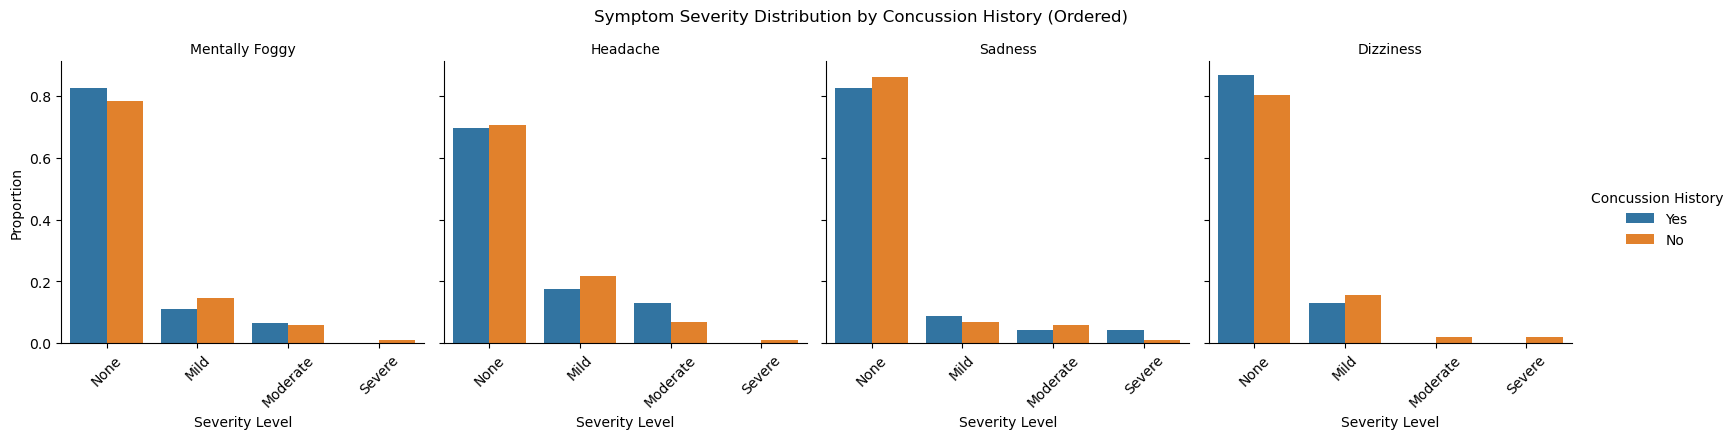

In [136]:
# Visualize the proportion of symptom severity levels by concussion history for each symptom

import seaborn as sns
import matplotlib.pyplot as plt

# Reshape data for plotting
plot_data = pd.DataFrame()

for var in ['Headache_Category', 'Dizziness_Category', 'Mentally Foggy_Category', 'Sadness_Category']:
    temp = pd.crosstab(binned_df['Concussion History_Yes'], binned_df[var], normalize='index')
    temp['Concussion History'] = temp.index.map({0: 'No', 1: 'Yes'})
    temp = temp.reset_index(drop=True).melt(id_vars='Concussion History', var_name='Symptom Level', value_name='Proportion')
    temp['Symptom'] = var.replace('_Category', '')
    plot_data = pd.concat([plot_data, temp], ignore_index=True)

# Define the desired order for symptom levels
severity_order = ['None', 'Mild', 'Moderate', 'Severe']

# Ensure Symptom Level is a categorical variable with the specified order
plot_data['Symptom Level'] = pd.Categorical(plot_data['Symptom Level'], categories=severity_order, ordered=True)

# Replot with the ordered severity levels
g = sns.catplot(
    data=plot_data.sort_values('Symptom Level'),
    x="Symptom Level", y="Proportion", hue="Concussion History",
    col="Symptom", kind="bar", height=4, aspect=1
)
g.set_titles("{col_name}")
g.set_axis_labels("Severity Level", "Proportion")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Symptom Severity Distribution by Concussion History (Ordered)")
plt.show()

In [135]:
# Step 1: Bin symptom scores into categories
def categorize_symptom(val):
    if val == 0:
        return 'None'
    elif val <= 2/6:
        return 'Mild'
    elif val <= 4/6:
        return 'Moderate'
    else:
        return 'Severe'

# Apply categorization to relevant symptoms
binned_df2 = df_encoded.copy()
for var in ['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']:
    binned_df2[var + '_Category'] = binned_df[var].apply(categorize_symptom)

# Step 2 & 3: Perform chi-square tests comparing each symptom category to concussion history
chi_square_results = []
from scipy.stats import chi2_contingency

for var in ['Headache_Category', 'Dizziness_Category', 'Mentally Foggy_Category', 'Sadness_Category']:
    contingency_table = pd.crosstab(binned_df2['Depression Diagnosis_Yes'], binned_df2[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Symptom': var.replace('_Category', ''),
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

# Convert results to DataFrame
chi_square_df2 = pd.DataFrame(chi_square_results)

chi_square_df2

,Symptom,Chi2 Statistic,p-value,Degrees of Freedom
0,Headache,7.567296,0.055854,3
1,Dizziness,12.610364,0.005560,3
2,Mentally Foggy,4.416377,0.219872,3
3,Sadness,15.180899,0.001668,3


/Users/dominicvaldiserri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


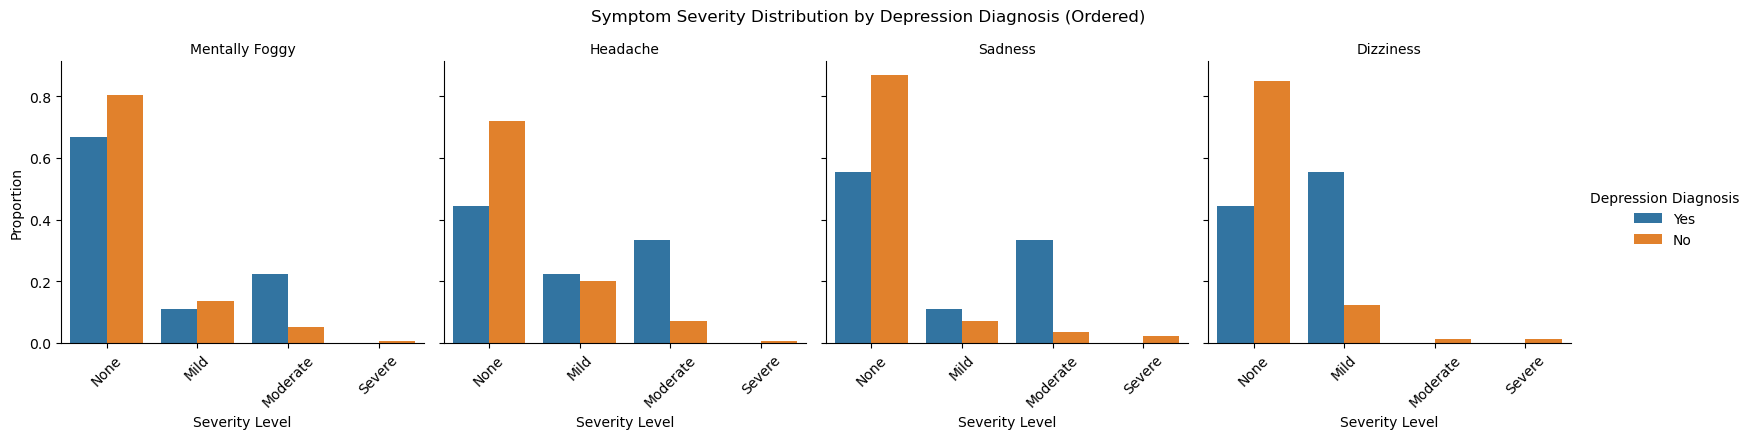

In [137]:
# Reshape data for plotting by Depression Diagnosis
plot_data_depression = pd.DataFrame()

for var in ['Headache_Category', 'Dizziness_Category', 'Mentally Foggy_Category', 'Sadness_Category']:
    temp = pd.crosstab(binned_df2['Depression Diagnosis_Yes'], binned_df2[var], normalize='index')
    temp['Depression Diagnosis'] = temp.index.map({0: 'No', 1: 'Yes'})
    temp = temp.reset_index(drop=True).melt(id_vars='Depression Diagnosis', var_name='Symptom Level', value_name='Proportion')
    temp['Symptom'] = var.replace('_Category', '')
    plot_data_depression = pd.concat([plot_data_depression, temp], ignore_index=True)

# Ensure Symptom Level is a categorical variable with the specified order
plot_data_depression['Symptom Level'] = pd.Categorical(plot_data_depression['Symptom Level'], categories=severity_order, ordered=True)

# Plot grouped bar charts
g = sns.catplot(
    data=plot_data_depression.sort_values('Symptom Level'),
    x="Symptom Level", y="Proportion", hue="Depression Diagnosis",
    col="Symptom", kind="bar", height=4, aspect=1
)
g.set_titles("{col_name}")
g.set_axis_labels("Severity Level", "Proportion")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Symptom Severity Distribution by Depression Diagnosis (Ordered)")
plt.show()


In [142]:
# Use symptom predictors for logistic regression predicting Concussion History
X_concussion_symptoms = binned_df[['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']]
X_concussion_symptoms = sm.add_constant(X_concussion_symptoms)
y_concussion = binned_df['Concussion History_Yes']

# Fit logistic regression model
logit_model_concussion_symptoms = sm.Logit(y_concussion, X_concussion_symptoms)
result_concussion_symptoms = logit_model_concussion_symptoms.fit()

# Summarize with odds ratios and confidence intervals
summary_df_concussion_symptoms = pd.DataFrame({
    'Variable': result_concussion_symptoms.params.index,
    'Coefficient': result_concussion_symptoms.params.values,
    'Odds Ratio': result_concussion_symptoms.params.apply(np.exp),
    'p-value': result_concussion_symptoms.pvalues,
    '95% CI Lower': np.exp(result_concussion_symptoms.conf_int()[0]),
    '95% CI Upper': np.exp(result_concussion_symptoms.conf_int()[1])
})

summary_df_concussion_symptoms

Optimization terminated successfully.
         Current function value: 0.589161
         Iterations 7


,Variable,Coefficient,Odds Ratio,p-value,95% CI Lower,95% CI Upper
const,const,-0.781040,0.457930,0.000285,0.300320,0.698253
Headache,Headache,1.410043,4.096133,0.285624,0.307837,54.503826
Dizziness,Dizziness,-6.187748,0.002054,0.033115,0.000007,0.609095
Mentally Foggy,Mentally Foggy,-1.479065,0.227851,0.377854,0.008511,6.099545
Sadness,Sadness,3.056613,21.255450,0.082619,0.673708,670.607839


In [144]:
univariate_concussion_results = []

for symptom in ['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']:
    X_uni = sm.add_constant(binned_df[[symptom]])
    model_uni = sm.Logit(y_concussion, X_uni).fit(disp=0)
    univariate_concussion_results.append({
        'Symptom': symptom,
        'Coefficient': model_uni.params[symptom],
        'Odds Ratio': np.exp(model_uni.params[symptom]),
        'p-value': model_uni.pvalues[symptom],
        '95% CI Lower': np.exp(model_uni.conf_int().loc[symptom][0]),
        '95% CI Upper': np.exp(model_uni.conf_int().loc[symptom][1])
    })

# Create DataFrame for display
univariate_concussion_df = pd.DataFrame(univariate_concussion_results)

univariate_concussion_df

,Symptom,Coefficient,Odds Ratio,p-value,95% CI Lower,95% CI Upper
0,Headache,0.463050,1.588913,0.606853,0.272348,9.269938
1,Dizziness,-2.395215,0.091153,0.174713,0.002868,2.897162
2,Mentally Foggy,-0.406596,0.665913,0.720785,0.071627,6.190969
3,Sadness,0.698707,2.011151,0.436358,0.346217,11.682639


In [146]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

# Prepare data for the multivariate model
X_multi = sm.add_constant(binned_df[['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']])
y_multi = binned_df['Concussion History_Yes']

# Fit model and predict
model_multi = sm.Logit(y_multi, X_multi).fit(disp=0)
pred_probs_multi = model_multi.predict(X_multi)
pred_classes_multi = (pred_probs_multi >= 0.5).astype(int)

# Calculate metrics
accuracy_multi = accuracy_score(y_multi, pred_classes_multi)
precision_multi = precision_score(y_multi, pred_classes_multi, zero_division=0)
recall_multi = recall_score(y_multi, pred_classes_multi)
roc_auc_multi = roc_auc_score(y_multi, pred_probs_multi)

# Display results
evaluation_metrics = pd.DataFrame([{
    'Model': 'Multivariate Symptoms Model',
    'Accuracy': accuracy_multi,
    'Precision': precision_multi,
    'Recall': recall_multi,
    'ROC AUC': roc_auc_multi
}])

evaluation_metrics

,Model,Accuracy,Precision,Recall,ROC AUC
0,Multivariate Symptoms Model,0.716216,0.833333,0.108696,0.551471


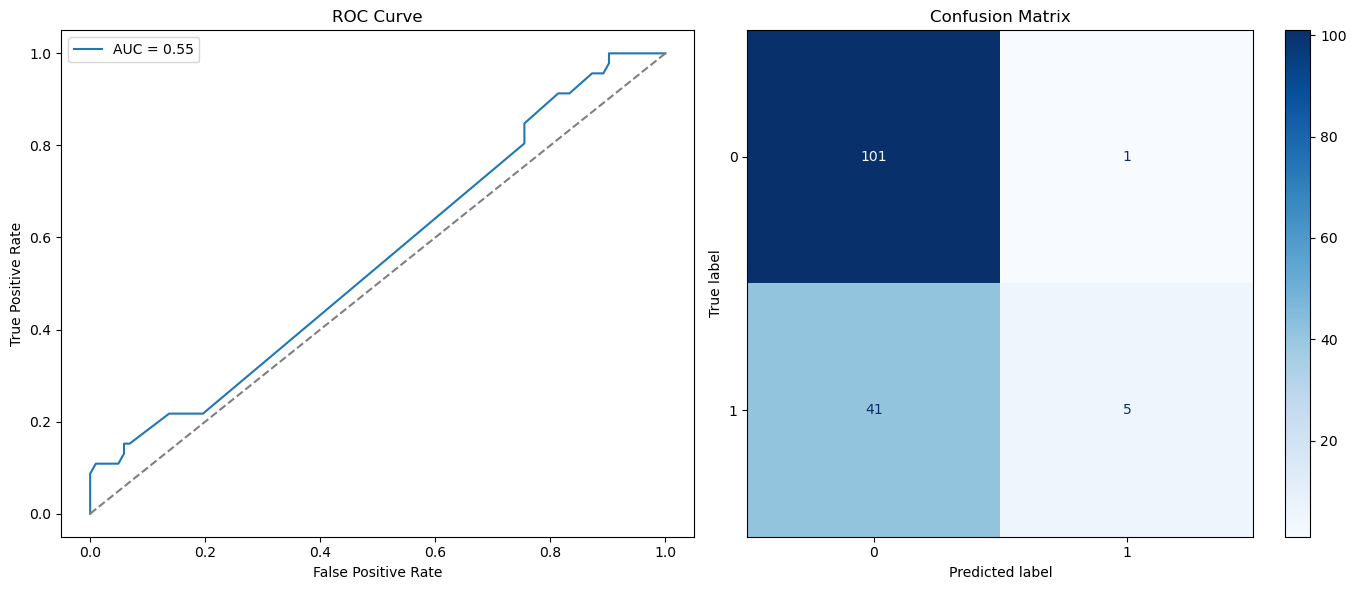

In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_multi, pred_probs_multi)

# Create figure with two plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC Curve
axs[0].plot(fpr, tpr, label=f"AUC = {roc_auc_multi:.2f}")
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[0].set_title("ROC Curve")
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].legend()

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_multi, pred_classes_multi, ax=axs[1], cmap="Blues")
axs[1].set_title("Confusion Matrix")

plt.tight_layout()
plt.show()